In [1]:
import numpy as np
from bayescurvefit.execution import BayesFitModel


# Define the curve fitting function
def log_logistic_4p(
    x: np.ndarray, pec50: float, slope: float, front: float, back: float
) -> np.ndarray:
    with np.errstate(over="ignore", under="ignore", invalid="ignore"):
        y = (front - back) / (1 + 10 ** (slope * (x + pec50))) + back
        return y


# Input data
x_data = np.array([-9.0, -8.3, -7.6, -6.9, -6.1, -5.4, -4.7, -4.0])
y_data = np.array([1.12, 0.74, 1.03, 1.08, 0.76, 0.61, 0.39, 0.38])
params_range = [(5, 8), (0.01, 10), (0.28, 1.22), (0.28, 1.22)]  # Parameter bounds
param_names = ["pec50", "slope", "front", "back"]

# Run Bayesian curve fitting
run = BayesFitModel(
    x_data=x_data,
    y_data=y_data,
    fit_function=log_logistic_4p,
    params_range=params_range,
    param_names=param_names,
)

In [2]:
# Get results
results = run.get_result()
print(results)

fit_pec50              5.851183
fit_slope              1.160561
fit_front              1.055557
fit_back               0.382323
std_pec50              0.208281
std_slope              0.544545
std_front               0.06474
std_back               0.049983
est_std                0.089587
null_mean              0.762365
rmse                   0.121317
pep                    0.030396
convergence_warning       False
dtype: object


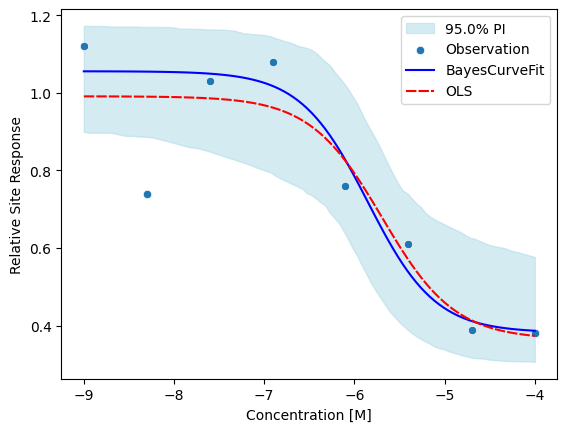

In [3]:
import matplotlib.pyplot as plt

# Plot fitted curve
fig, ax = plt.subplots()
run.analysis.plot_fitted_curve(ax=ax)
ax.set_xlabel("Concentration [M]")
ax.set_ylabel("Relative Site Response")
plt.show()

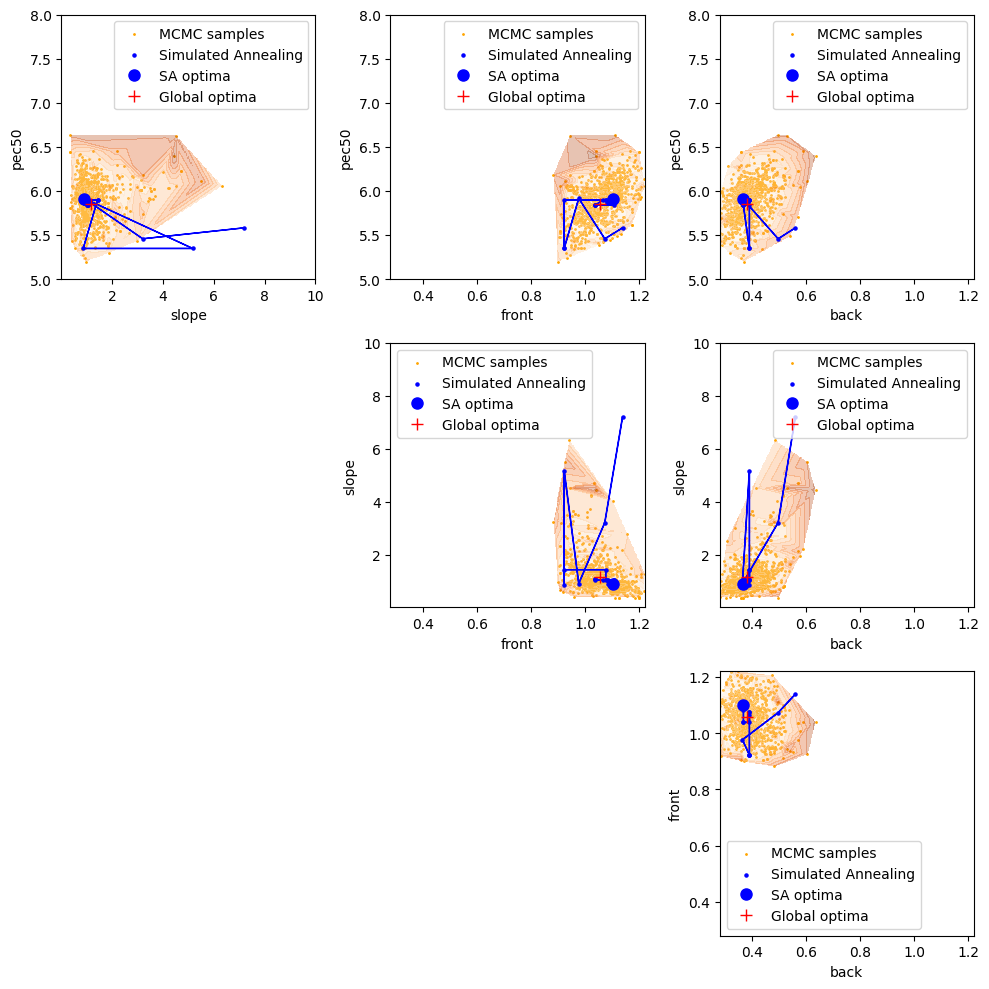

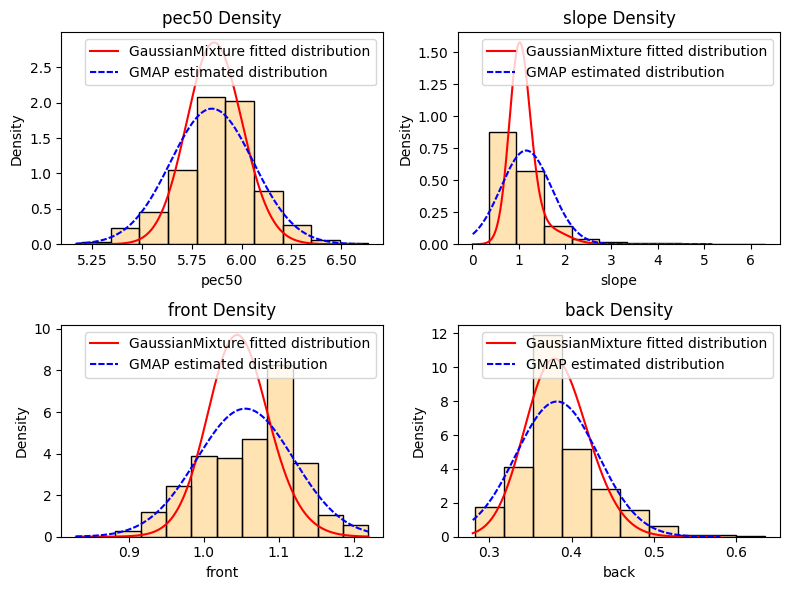

In [4]:
# Parameter pairwise comparisons
run.analysis.plot_pairwise_comparison(figsize=(10, 10))

# Parameter distributions
run.analysis.plot_param_dist()